In [313]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

In [314]:
df = pd.read_csv("heart_original.csv")

In [315]:

df_v1 = df

# DATASET BASED ON REMOVAL OF LARGEST TRESTBPS - df_v2
largest_bps = df_v1['trestbps'].max()
largest_idx = df_v1['trestbps'].idxmax()
df_v2 = df_v1.drop(largest_idx)
df_v2 = df_v2.reset_index(drop=True)


# DATASET BASED ON REMOVAL OF SMALLEST TRESTBPS - df_v3
smallest_bps = df_v1['trestbps'].min()
smallest_idx = df_v1['trestbps'].idxmin()
df_v3 = df_v1.drop(smallest_idx)
df_v3 = df_v2.reset_index(drop=True)


In [316]:
# Calculate sensitivity for trestbps
print("SINCE WE HAVE TWO NEIGHBORING DATASETS THAT DIFFER IN ONE ROW, WE CAN HAVE MAX SENSITIVITY OF 1")

SINCE WE HAVE TWO NEIGHBORING DATASETS THAT DIFFER IN ONE ROW, WE CAN HAVE MAX SENSITIVITY OF 1


In [317]:
# APPLYING GAUSSIAN MECHANISM

delta = 1e-6

def gaussian_mech(sensitivity, epsilon, delta):
    noise = np.random.normal(loc=0, scale=(sensitivity * np.sqrt(2*np.log(1.25/delta))) / epsilon)
    return noise

In [318]:
epsilonVal_GM = np.array([0.1,0.3,0.5,0.9])
error_GM = []

In [319]:
# RELATIVE ERROR CALCULATION - WHEN EPSILON = 0.1

noisyData = df_v2['trestbps'] + gaussian_mech(1, 0.1, delta)
relativeErrorTrestBPS = (abs(noisyData - df_v1['trestbps']) / df_v1['trestbps'] )
avgError = relativeErrorTrestBPS.mean()
error_GM.append(avgError)
print(avgError)

0.41083865834070166


In [320]:
# RELATIVE ERROR CALCULATION - WHEN EPSILON = 0.3

noisyData = df_v2['trestbps'] + gaussian_mech(1, 0.3, delta)
relativeErrorTrestBPS = (abs(noisyData - df_v1['trestbps']) / df_v1['trestbps'] )
avgError = relativeErrorTrestBPS.mean()
error_GM.append(avgError)
print(avgError)

0.16274454401689742


In [321]:
# RELATIVE ERROR CALCULATION - WHEN EPSILON = 0.5

noisyData = df_v2['trestbps'] + gaussian_mech(1, 0.5, delta)
relativeErrorTrestBPS = (abs(noisyData - df_v1['trestbps']) / df_v1['trestbps'] ) 
avgError = relativeErrorTrestBPS.mean()
error_GM.append(avgError)
print(avgError)

0.14461301726770218


In [322]:
# RELATIVE ERROR CALCULATION - WHEN EPSILON = 0.9

noisyData = df_v2['trestbps'] + gaussian_mech(1, 0.9, delta)
relativeErrorTrestBPS = (abs(noisyData - df_v1['trestbps']) / df_v1['trestbps'] ) 
avgError = relativeErrorTrestBPS.mean()
error_GM.append(avgError)
print(avgError)

0.13415268845015887


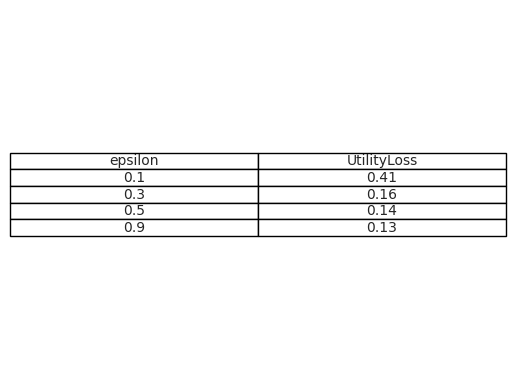

In [323]:
error_GM_Round = np.round(error_GM,2)
table = np.column_stack((epsilonVal_GM, error_GM_Round))

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
ax.table(cellText=table, colLabels=['epsilon', 'UtilityLoss'], cellLoc='center', loc='center')

plt.show()

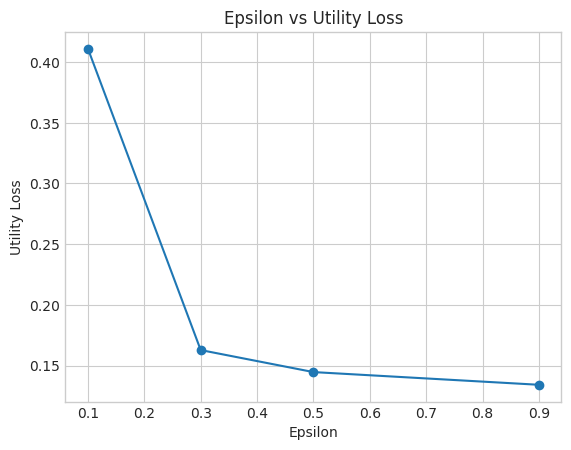

In [324]:
plt.plot(epsilonVal_GM, error_GM, marker='o')

# Set the axis labels and title
plt.xlabel('Epsilon')
plt.ylabel('Utility Loss')
plt.title('Epsilon vs Utility Loss')

# Show the graph
plt.show()

In [325]:
# ACCURACY BASED ON ERROR

error_GM_Percent = [100 * e for e in error_GM]

# Subtract each value from 100
accuracy_GM = np.round([100 - e for e in error_GM_Percent],2)

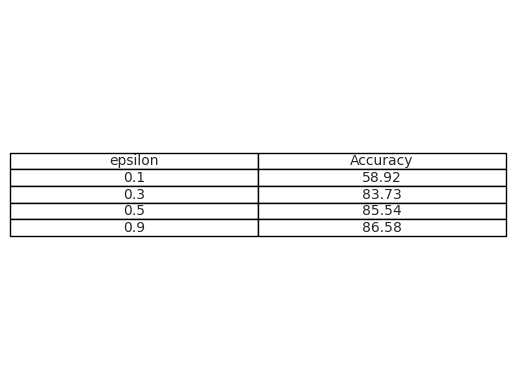

In [326]:
table = np.column_stack((epsilonVal_GM, accuracy_GM))

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
ax.table(cellText=table, colLabels=['epsilon', 'Accuracy'], cellLoc='center', loc='center')

plt.show()

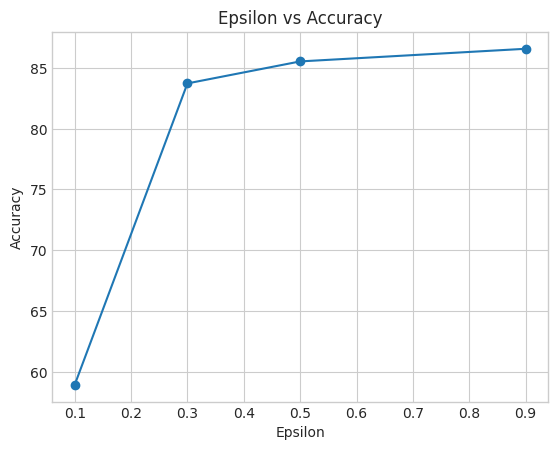

In [327]:
plt.plot(epsilonVal_GM, accuracy_GM, marker='o')

# Set the axis labels and title
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Epsilon vs Accuracy')

# Show the graph
plt.show()